#### Importing required python library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Loading the train file of dataset and removing the Id

In [2]:
df=pd.read_csv('train_Df64byy.csv')
df=df.drop(columns="ID",axis=1)
df.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


 #### checking for the null values in each columns

In [3]:
df.isnull().sum()

City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 13 columns):
City_Code                  50882 non-null object
Region_Code                50882 non-null int64
Accomodation_Type          50882 non-null object
Reco_Insurance_Type        50882 non-null object
Upper_Age                  50882 non-null int64
Lower_Age                  50882 non-null int64
Is_Spouse                  50882 non-null object
Health Indicator           39191 non-null object
Holding_Policy_Duration    30631 non-null object
Holding_Policy_Type        30631 non-null float64
Reco_Policy_Cat            50882 non-null int64
Reco_Policy_Premium        50882 non-null float64
Response                   50882 non-null int64
dtypes: float64(2), int64(5), object(6)
memory usage: 5.0+ MB


#### statastical analysis of  numerical values of column

In [5]:
df.describe()

,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882.000000,50882.000000,30631.000000,50882.000000,50882.000000,50882.000000
mean,1732.788707,44.856275,42.738866,2.439228,15.115188,14183.950069,0.239947
std,1424.081652,17.310271,17.319375,1.025923,6.340663,6590.074873,0.427055
min,1.000000,18.000000,16.000000,1.000000,1.000000,2280.000000,0.000000
25%,523.000000,28.000000,27.000000,1.000000,12.000000,9248.000000,0.000000
50%,1391.000000,44.000000,40.000000,3.000000,17.000000,13178.000000,0.000000
75%,2667.000000,59.000000,57.000000,3.000000,20.000000,18096.000000,0.000000
max,6194.000000,75.000000,75.000000,4.000000,22.000000,43350.400000,1.000000


### Number of unique city

In [6]:
df['City_Code'].nunique()

36

#### Number of unique Accomodation Type

In [7]:
df['Accomodation_Type'].nunique()

2

In [8]:
df['Accomodation_Type'].unique()

array(['Rented', 'Owned'], dtype=object)

In [9]:
df['Accomodation_Type'].value_counts()

Owned     27951
Rented    22931
Name: Accomodation_Type, dtype: int64

### Count of each Accomadation type of Customer

<Figure size 1440x864 with 0 Axes>

Text(0.5, 1.0, 'Count of Accomadation type of Customer')

Text(0.5, 0, 'Accomadation Type')

Text(0, 0.5, 'Count')

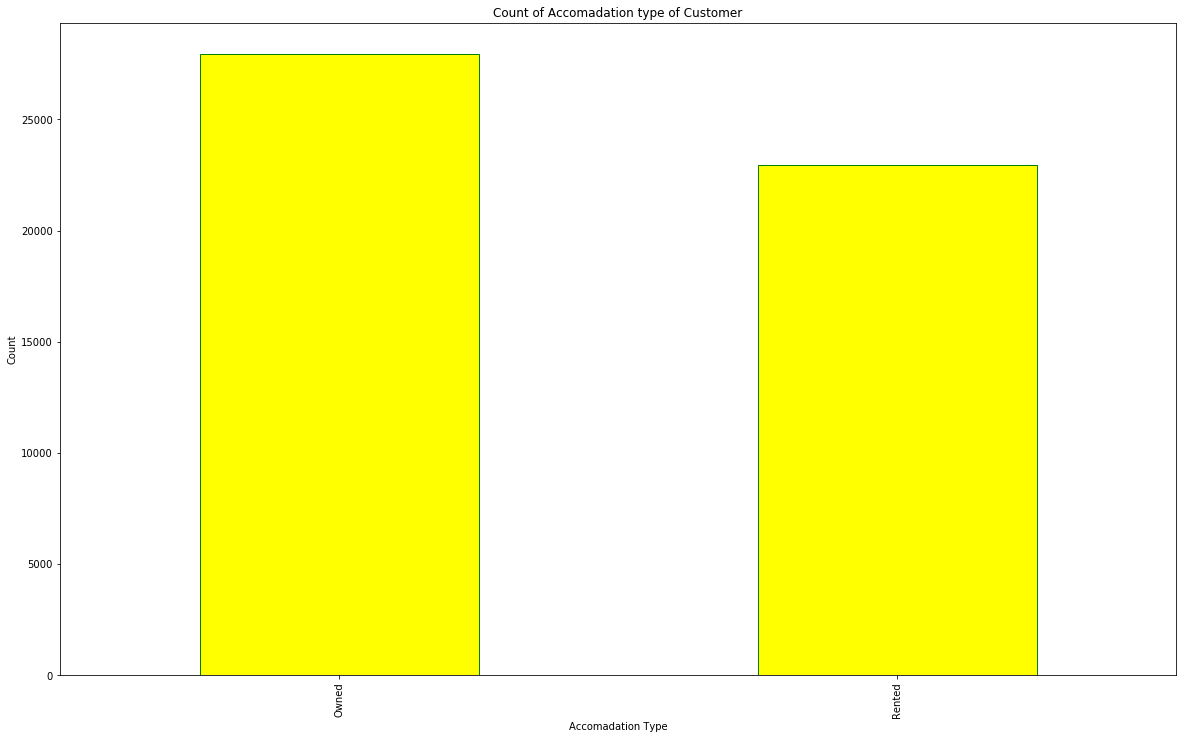

In [10]:
plt.figure(figsize=(20,12))
df['Accomodation_Type'].value_counts().plot(kind="bar",color="yellow",edgecolor="green")
plt.title("Count of Accomadation type of Customer")
plt.xlabel("Accomadation Type")
plt.ylabel("Count")
plt.show()

In [11]:
df.columns

Index(['City_Code', 'Region_Code', 'Accomodation_Type', 'Reco_Insurance_Type',
       'Upper_Age', 'Lower_Age', 'Is_Spouse', 'Health Indicator',
       'Holding_Policy_Duration', 'Holding_Policy_Type', 'Reco_Policy_Cat',
       'Reco_Policy_Premium', 'Response'],
      dtype='object')

# Number of regions taken into consideration

In [12]:
df.Region_Code.nunique()

5316

In [13]:
df.Reco_Insurance_Type.unique()

array(['Individual', 'Joint'], dtype=object)

In [14]:
df['Reco_Insurance_Type'].value_counts()

Individual    40536
Joint         10346
Name: Reco_Insurance_Type, dtype: int64

### Count of each Recommended insurance type of Customer

<Figure size 1440x864 with 0 Axes>

Text(0.5, 1.0, 'Count of Recommended insurance type of Customer')

Text(0.5, 0, 'Recommended insurance type')

Text(0, 0.5, 'Count')

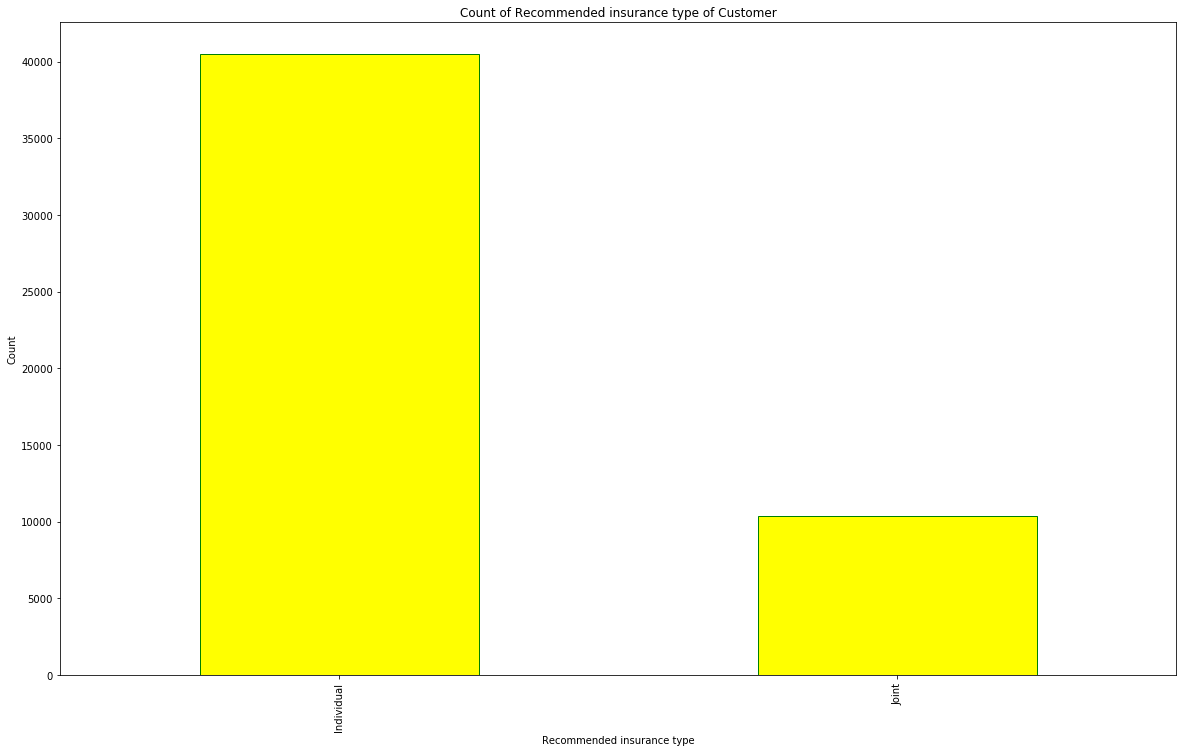

In [15]:
plt.figure(figsize=(20,12))
df['Reco_Insurance_Type'].value_counts().plot(kind="bar",color="yellow",edgecolor="green")
plt.title("Count of Recommended insurance type of Customer")
plt.xlabel("Recommended insurance type")
plt.ylabel("Count")
plt.show()

### Code of top ten cities having higher customer

<Figure size 1440x864 with 0 Axes>

Text(0.5, 1.0, 'Count of City code of Customer')

Text(0.5, 0, 'City code')

Text(0, 0.5, 'Count')

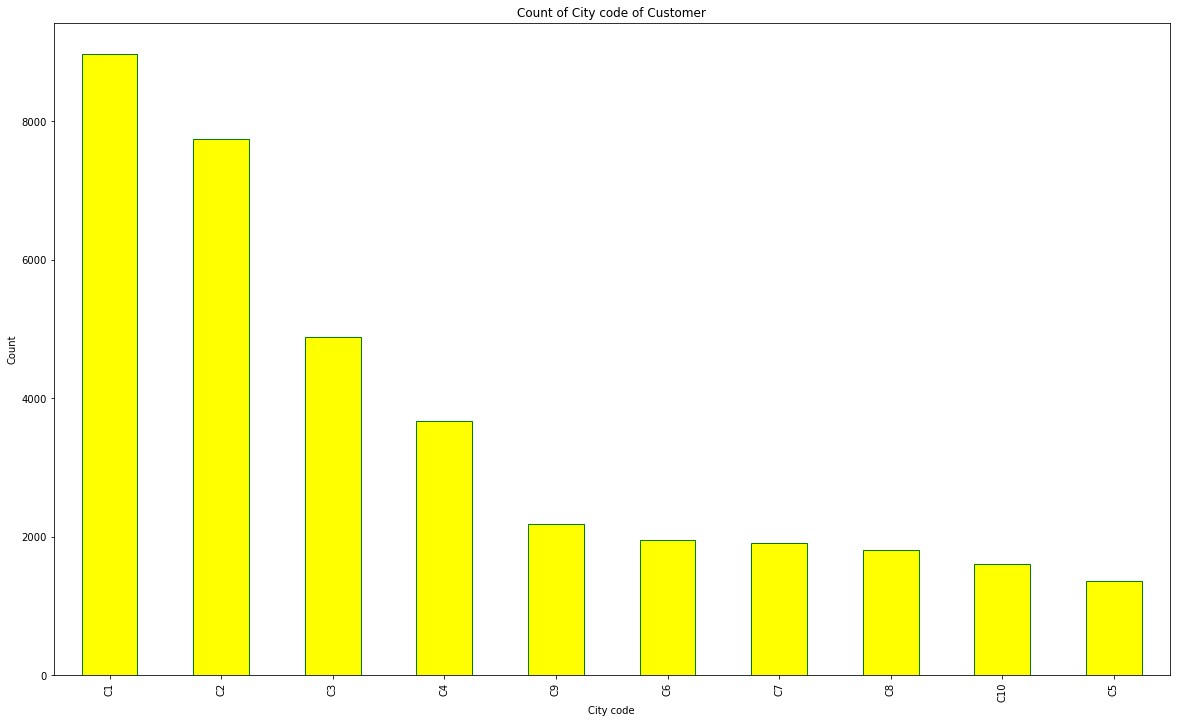

In [17]:
plt.figure(figsize=(20,12))
df['City_Code'].value_counts(ascending=False).head(10).plot(kind="bar",color="yellow",edgecolor="green")
plt.title("Count of City code of Customer")
plt.xlabel("City code")
plt.ylabel("Count")
plt.show()

In [18]:
df['Upper_Age'].describe()

count    50882.000000
mean        44.856275
std         17.310271
min         18.000000
25%         28.000000
50%         44.000000
75%         59.000000
max         75.000000
Name: Upper_Age, dtype: float64

In [19]:
df['Lower_Age'].describe()

count    50882.000000
mean        42.738866
std         17.319375
min         16.000000
25%         27.000000
50%         40.000000
75%         57.000000
max         75.000000
Name: Lower_Age, dtype: float64

### Count of top ten recommended policy category

<Figure size 1440x864 with 0 Axes>

Text(0.5, 1.0, 'Count of Recommended policy category')

Text(0.5, 0, 'Recommended policy category')

Text(0, 0.5, 'Count')

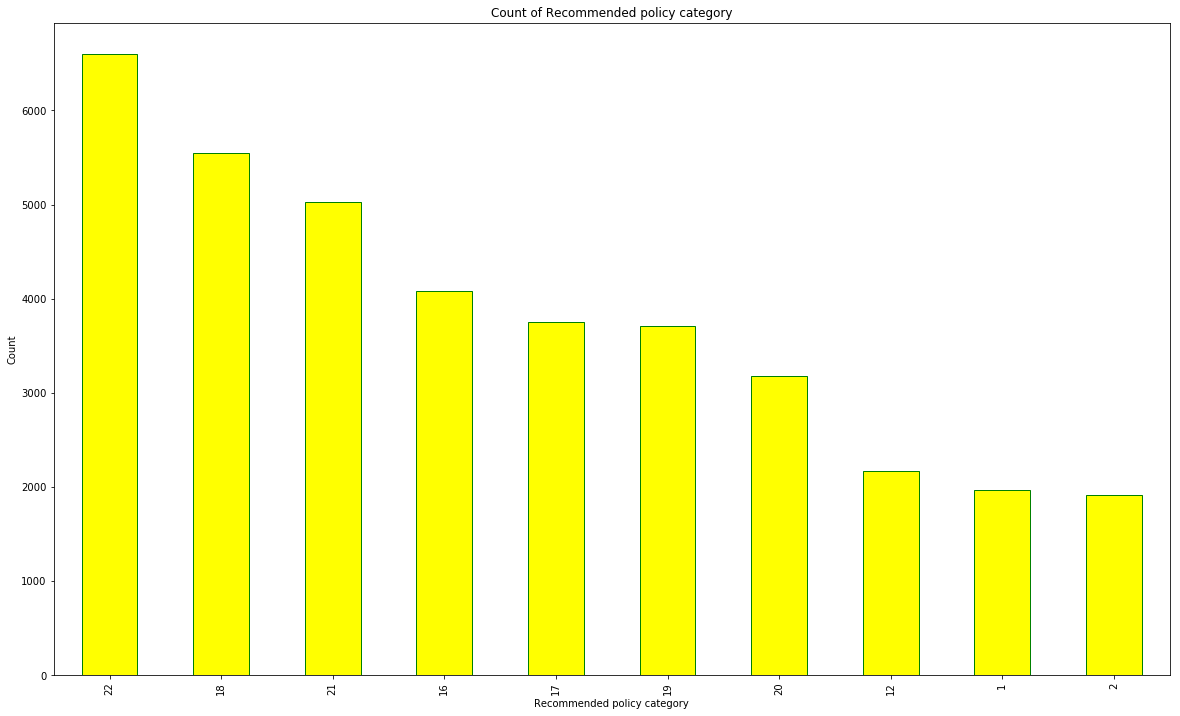

In [20]:
plt.figure(figsize=(20,12))
df['Reco_Policy_Cat'].value_counts(ascending=False).head(10).plot(kind="bar",color="yellow",edgecolor="green")
plt.title("Count of Recommended policy category")
plt.xlabel("Recommended policy category")
plt.ylabel("Count")
plt.show()

In [21]:
df['Reco_Policy_Premium'].describe()

count    50882.000000
mean     14183.950069
std       6590.074873
min       2280.000000
25%       9248.000000
50%      13178.000000
75%      18096.000000
max      43350.400000
Name: Reco_Policy_Premium, dtype: float64

Maximum recommended policy premium is 43350 and minimum recommended policy premium is 2280

In [22]:
df['Response'].value_counts()

0    38673
1    12209
Name: Response, dtype: int64

In [23]:
df['Health Indicator'].unique()

array(['X1', 'X2', nan, 'X4', 'X3', 'X6', 'X5', 'X8', 'X7', 'X9'],
      dtype=object)

In [24]:
df['Holding_Policy_Type'].unique()

array([ 3., nan,  1.,  4.,  2.])

In [25]:
df['Holding_Policy_Duration'].unique()

array(['14+', nan, '1.0', '3.0', '5.0', '9.0', '14.0', '7.0', '2.0',
       '11.0', '10.0', '8.0', '6.0', '4.0', '13.0', '12.0'], dtype=object)

In [26]:
df['Health Indicator'].isnull().mean()

0.2297669116780001

In [27]:
df['Holding_Policy_Duration'].isnull().mean()

0.3979992924806415

In [28]:
df['Holding_Policy_Type'].isnull().mean()

0.3979992924806415

We have seen around 23 percent missing values in Health Indicator column as well as around 40 percent missing values in Holding Policy duration and Holding Policy Type but since those are important columns for our analysis so we will impute them

#### function to impute nan values with most frequent value

In [29]:
def impute_nan(df,variable):
    most_frequent_category=df[variable].mode()[0]
    df[variable].fillna(most_frequent_category,inplace=True)


In [30]:

for feature in ['Health Indicator','Holding_Policy_Duration','Holding_Policy_Type']:
    impute_nan(df,feature)

In [31]:
df.isnull().sum()

City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64

### Count of each type of Health Indicator

<Figure size 1440x864 with 0 Axes>

Text(0.5, 1.0, 'Count of Health Indicator')

Text(0.5, 0, 'Health Indicator')

Text(0, 0.5, 'Count')

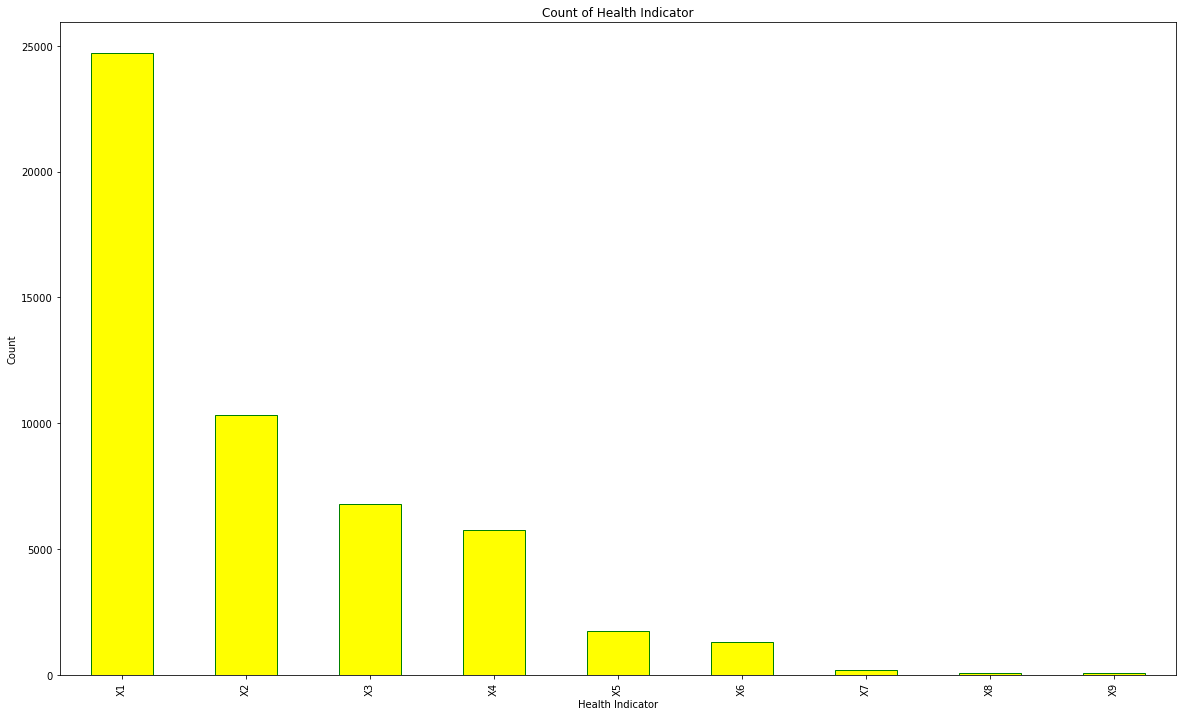

In [32]:
plt.figure(figsize=(20,12))
df['Health Indicator'].value_counts(ascending=False).head(10).plot(kind="bar",color="yellow",edgecolor="green")
plt.title("Count of Health Indicator")
plt.xlabel("Health Indicator")
plt.ylabel("Count")
plt.show()

### Count of each type of duration of Holding policy

<Figure size 1440x864 with 0 Axes>

Text(0.5, 1.0, 'Count of Holding policy duration')

Text(0.5, 0, 'Holding policy duration')

Text(0, 0.5, 'Count')

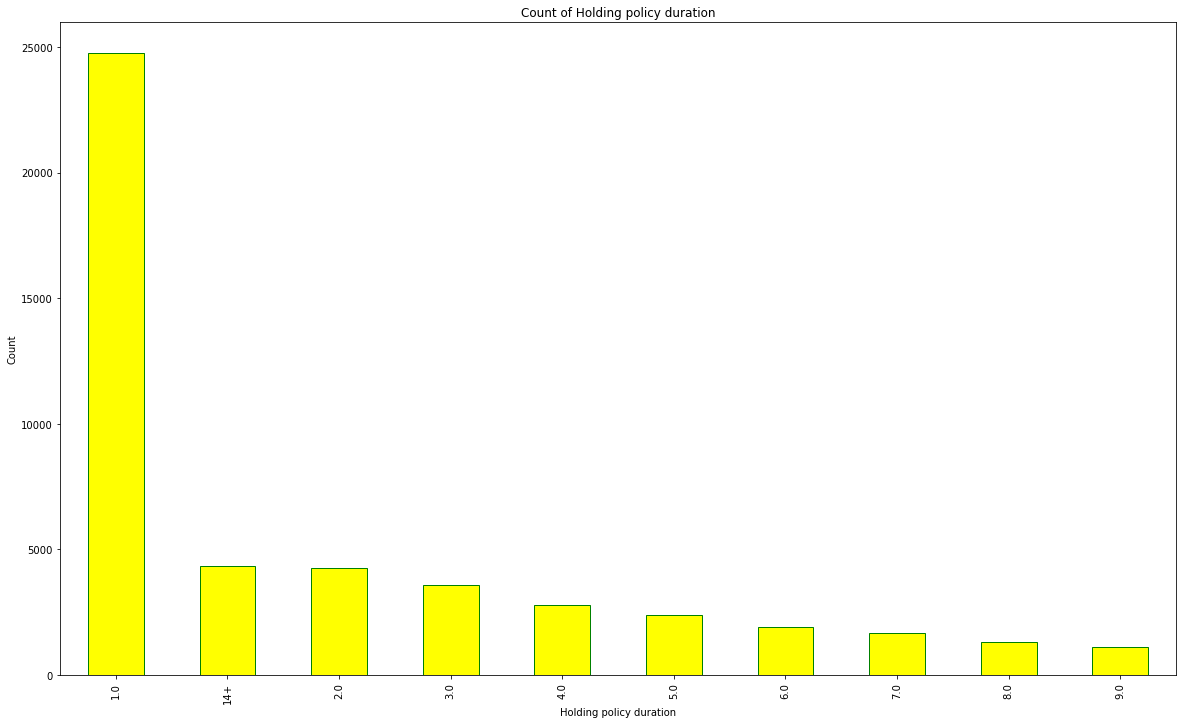

In [33]:
plt.figure(figsize=(20,12))
df['Holding_Policy_Duration'].value_counts(ascending=False).head(10).plot(kind="bar",color="yellow",edgecolor="green")
plt.title("Count of Holding policy duration")
plt.xlabel("Holding policy duration")
plt.ylabel("Count")
plt.show()

### Count of Each type of Holding Policy

<Figure size 1440x864 with 0 Axes>

Text(0.5, 1.0, 'Count of Holding Policy Type')

Text(0.5, 0, 'Holding Policy Type')

Text(0, 0.5, 'Count')

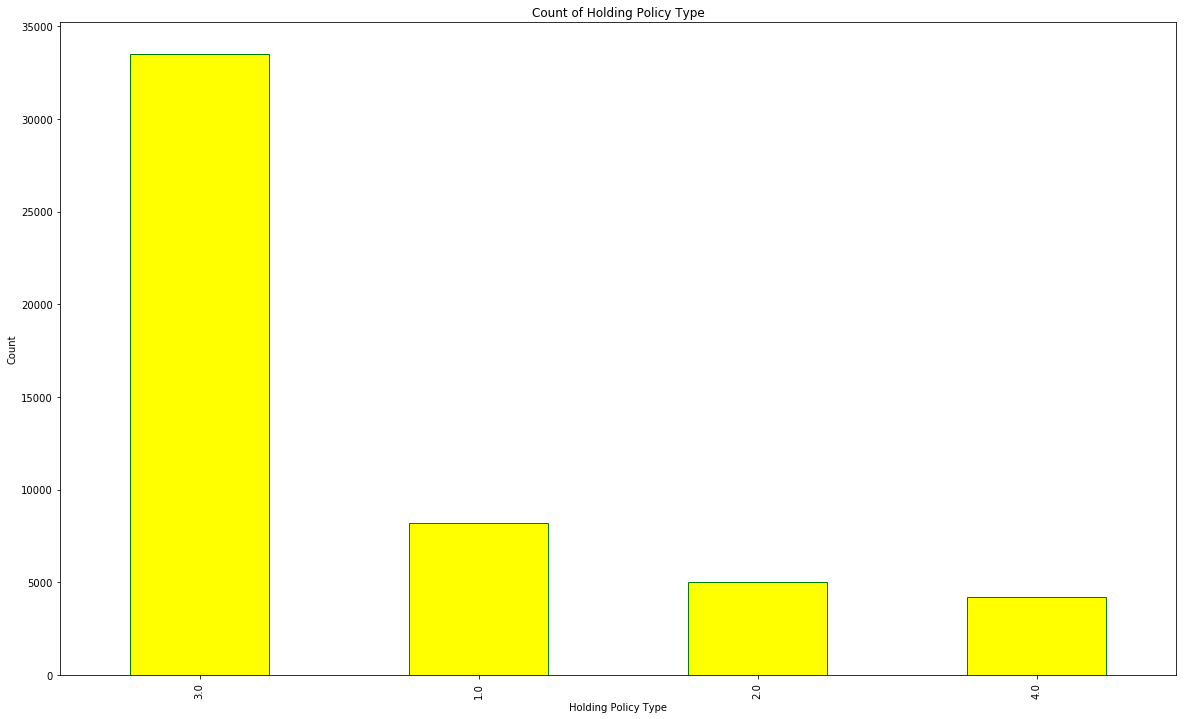

In [88]:
plt.figure(figsize=(20,12))
df['Holding_Policy_Type'].value_counts(ascending=False).head(10).plot(kind="bar",color="yellow",edgecolor="green")
plt.title("Count of Holding Policy Type")
plt.xlabel("Holding Policy Type")
plt.ylabel("Count")
plt.show()

In [35]:
df['Holding_Policy_Duration']=df['Holding_Policy_Duration'].str.replace("+","")

In [36]:
df['Is_Spouse'].unique()

array(['No', 'Yes'], dtype=object)

#### Performing One Hot Encoding for all categorical variables

In [37]:
Accomodation = df['Accomodation_Type']
Accomodation = pd.get_dummies(data=Accomodation)
Accomodation.head()

,Owned,Rented
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [38]:
Reco_Insurance_Type=df['Reco_Insurance_Type']
Reco_Insurance_Type = pd.get_dummies(data=Reco_Insurance_Type)
Reco_Insurance_Type.head()

,Individual,Joint
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0


In [39]:
Is_Spouse = df['Is_Spouse']
Is_Spouse = pd.get_dummies(data=Is_Spouse)
Is_Spouse.head()

,No,Yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [40]:
Health_Indicator=df['Health Indicator']
Health_Indicator=pd.get_dummies(data=Health_Indicator)
Health_Indicator.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9
0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 13 columns):
City_Code                  50882 non-null object
Region_Code                50882 non-null int64
Accomodation_Type          50882 non-null object
Reco_Insurance_Type        50882 non-null object
Upper_Age                  50882 non-null int64
Lower_Age                  50882 non-null int64
Is_Spouse                  50882 non-null object
Health Indicator           50882 non-null object
Holding_Policy_Duration    50882 non-null object
Holding_Policy_Type        50882 non-null float64
Reco_Policy_Cat            50882 non-null int64
Reco_Policy_Premium        50882 non-null float64
Response                   50882 non-null int64
dtypes: float64(2), int64(5), object(6)
memory usage: 5.0+ MB


In [42]:
df['Holding_Policy_Duration']=df['Holding_Policy_Duration'].astype(float)
df['Holding_Policy_Type']=df['Holding_Policy_Type'].astype(float)

In [43]:
df.drop(columns=['City_Code','Accomodation_Type','Reco_Insurance_Type','Is_Spouse','Health Indicator'],inplace=True)

#### Combining different dataset into one

In [44]:
df_train=pd.concat([df,Accomodation,Reco_Insurance_Type,Is_Spouse,Health_Indicator],axis=1)

In [45]:

y=df_train['Response']


In [46]:
df_train.drop(columns="Response",inplace=True)

In [47]:
X=df_train.iloc[:,:]

Feature Selection¶
Finding out the best feature which will contribute and have good relation with target variable. Following are some of the feature selection methods,

**heatmap**

**feature_importance_**

In [48]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(X,y)

C:\Users\shakil uz zaman\.conda\envs\py35\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [49]:
print(model.feature_importances_)

[0.21925205 0.11962824 0.12065276 0.08157937 0.04713626 0.14498416
 0.21505673 0.00375041 0.00387263 0.00097809 0.001105   0.00109382
 0.00099587 0.00912662 0.00871625 0.0061148  0.00645957 0.00375954
 0.00364287 0.0008897  0.00067448 0.00053079]


### Plot of 10 ten feature based on feature importance

<Figure size 864x576 with 0 Axes>

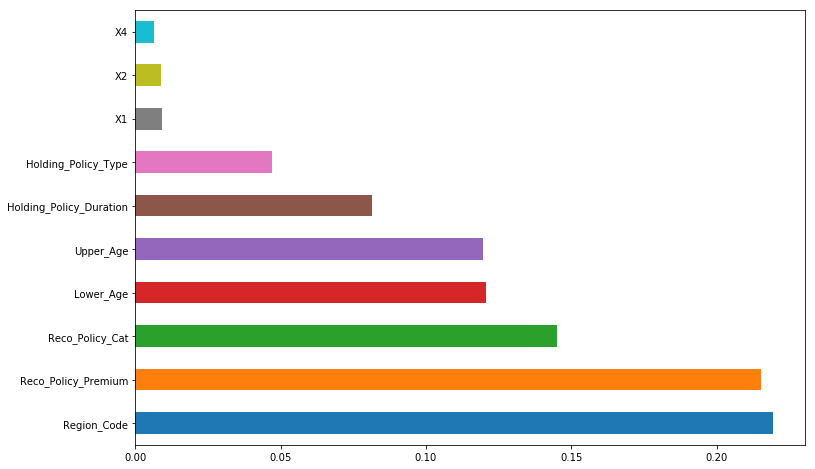

In [90]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [51]:
df_train.corr()

,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Owned,Rented,Individual,...,Yes,X1,X2,X3,X4,X5,X6,X7,X8,X9
Region_Code,1.000000,-0.005649,-0.005928,0.014130,0.009348,-0.065120,-0.010797,-0.009105,0.009105,0.004275,...,-0.002567,-0.016553,0.004497,0.001688,0.011805,0.008920,0.001703,-0.002992,0.013479,-0.001955
Upper_Age,-0.005649,1.000000,0.921392,0.371808,0.002579,0.025257,0.792689,0.419129,-0.419129,-0.227119,...,0.202947,-0.014932,0.018416,-0.031266,0.012452,0.033659,-0.006446,0.022272,0.005810,0.001003
Lower_Age,-0.005928,0.921392,1.000000,0.335421,-0.001842,0.021163,0.615739,0.369400,-0.369400,0.014998,...,0.062634,-0.012176,0.020164,-0.033854,0.013067,0.031052,-0.011230,0.021363,0.003201,0.000531
Holding_Policy_Duration,0.014130,0.371808,0.335421,1.000000,-0.084607,0.035704,0.283997,0.223303,-0.223303,-0.103109,...,0.092115,-0.015795,0.013032,-0.014073,0.016496,0.022318,-0.018066,0.012354,0.001471,0.004947
Holding_Policy_Type,0.009348,0.002579,-0.001842,-0.084607,1.000000,0.053760,0.012266,0.055255,-0.055255,-0.033907,...,0.043596,-0.020657,0.011136,-0.042030,0.044241,0.042282,-0.016678,0.018150,-0.003978,0.002833
Reco_Policy_Cat,-0.065120,0.025257,0.021163,0.035704,0.053760,1.000000,0.060989,0.022055,-0.022055,-0.020826,...,0.022676,-0.001639,0.007119,-0.014307,0.014678,0.011949,-0.023226,0.013131,-0.019330,-0.011834
Reco_Policy_Premium,-0.010797,0.792689,0.615739,0.283997,0.012266,0.060989,1.000000,0.350514,-0.350514,-0.596160,...,0.514727,-0.027360,0.021991,-0.037375,0.025462,0.051663,-0.012808,0.034073,0.001414,-0.001613
Owned,-0.009105,0.419129,0.369400,0.223303,0.055255,0.022055,0.350514,1.000000,-1.000000,-0.196833,...,0.191045,-0.035248,0.031060,-0.059642,0.058694,0.053728,-0.029799,0.023804,0.005202,0.001564
Rented,0.009105,-0.419129,-0.369400,-0.223303,-0.055255,-0.022055,-0.350514,-1.000000,1.000000,0.196833,...,-0.191045,0.035248,-0.031060,0.059642,-0.058694,-0.053728,0.029799,-0.023804,-0.005202,-0.001564
Individual,0.004275,-0.227119,0.014998,-0.103109,-0.033907,-0.020826,-0.596160,-0.196833,0.196833,1.000000,...,-0.881560,0.033662,-0.023326,0.036672,-0.033526,-0.047959,0.005696,-0.018246,-0.006415,-0.003041


<Figure size 1440x1440 with 0 Axes>

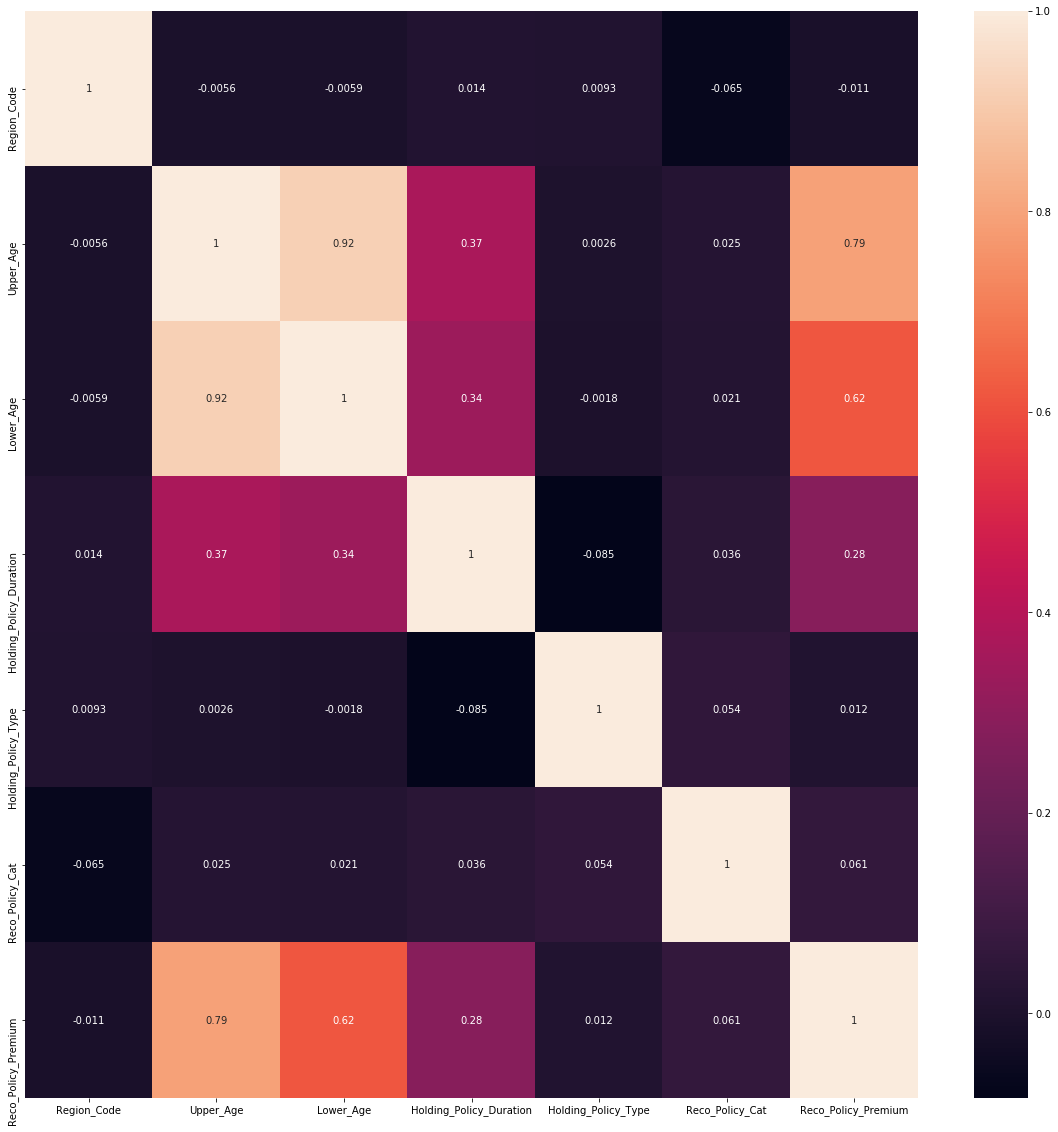

In [52]:
corr=df.iloc[:,:-1].corr()
top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(df[top_features].corr(),annot=True)

#### Loading test file

In [53]:
test_df=pd.read_csv('test_YCcRUnU.csv')
test_df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0


In [54]:
test_df.shape

(21805, 13)

In [55]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21805 entries, 0 to 21804
Data columns (total 13 columns):
ID                         21805 non-null int64
City_Code                  21805 non-null object
Region_Code                21805 non-null int64
Accomodation_Type          21805 non-null object
Reco_Insurance_Type        21805 non-null object
Upper_Age                  21805 non-null int64
Lower_Age                  21805 non-null int64
Is_Spouse                  21805 non-null object
Health Indicator           16778 non-null object
Holding_Policy_Duration    13202 non-null object
Holding_Policy_Type        13202 non-null float64
Reco_Policy_Cat            21805 non-null int64
Reco_Policy_Premium        21805 non-null float64
dtypes: float64(2), int64(5), object(6)
memory usage: 2.2+ MB


In [56]:
test_df.isnull().sum()

ID                            0
City_Code                     0
Region_Code                   0
Accomodation_Type             0
Reco_Insurance_Type           0
Upper_Age                     0
Lower_Age                     0
Is_Spouse                     0
Health Indicator           5027
Holding_Policy_Duration    8603
Holding_Policy_Type        8603
Reco_Policy_Cat               0
Reco_Policy_Premium           0
dtype: int64

In [57]:
test_df['Health Indicator'].isnull().mean()
test_df['Holding_Policy_Duration'].isnull().mean()
test_df['Holding_Policy_Type'].isnull().mean()

0.23054345333639073

0.39454253611556983

0.39454253611556983

#### Performing different data preprocessing like removing nan values

In [58]:
def impute_nan_test(df,variable):
    most_frequent_category=test_df[variable].mode()[0]
    test_df[variable].fillna(most_frequent_category,inplace=True)

In [59]:
for feature in ['Health Indicator','Holding_Policy_Duration','Holding_Policy_Type']:
    impute_nan_test(test_df,feature)

In [60]:
test_df.isnull().sum()

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
dtype: int64

In [61]:
Accomodation_test = test_df['Accomodation_Type']
Accomodation_test = pd.get_dummies(data=Accomodation_test)
Accomodation_test.head()

,Owned,Rented
0,1,0
1,1,0
2,0,1
3,0,1
4,1,0


In [62]:
Reco_Insurance_Type_test=test_df['Reco_Insurance_Type']
Reco_Insurance_Type_test = pd.get_dummies(data=Reco_Insurance_Type_test)
Reco_Insurance_Type_test.head()

,Individual,Joint
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0


In [63]:
Is_Spouse_test = test_df['Is_Spouse']
Is_Spouse_test = pd.get_dummies(data=Is_Spouse_test)
Is_Spouse_test.head()

,No,Yes
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0


In [64]:
Health_Indicator_test=test_df['Health Indicator']
Health_Indicator_test=pd.get_dummies(data=Health_Indicator_test)
Health_Indicator_test.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9
0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0


In [65]:
test_df['Holding_Policy_Duration'] = test_df['Holding_Policy_Duration'].str.replace("+","")

In [66]:
test_df['Holding_Policy_Duration']=test_df['Holding_Policy_Duration'].astype(float)
test_df['Holding_Policy_Type']=test_df['Holding_Policy_Type'].astype(float)

In [102]:
test_df.drop(columns=['City_Code','Accomodation_Type','Reco_Insurance_Type','Is_Spouse','Health Indicator'],inplace=True)

In [103]:
df_test=pd.concat([test_df,Accomodation,Reco_Insurance_Type,Is_Spouse,Health_Indicator],axis=1)

#### Splitting the dataset into trainset and testset

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Model creation and training of model

In [68]:
from sklearn.ensemble import RandomForestClassifier
cl_rf = RandomForestClassifier()
cl_rf.fit(X_train, y_train)

C:\Users\shakil uz zaman\.conda\envs\py35\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [69]:
y_pred = cl_rf.predict(X_test)

In [70]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7380281690140845

In [71]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.95      0.85     11560
           1       0.32      0.07      0.11      3705

   micro avg       0.74      0.74      0.74     15265
   macro avg       0.54      0.51      0.48     15265
weighted avg       0.65      0.74      0.67     15265



Hyperparameter Tuning

Choose following method for hyperparameter tuning
RandomizedSearchCV --> Fast

Assign hyperparameters in form of dictionery

Fit the model

Check best paramters and best score

In [76]:
from sklearn.model_selection import RandomizedSearchCV

In [83]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [84]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [85]:
rf_random = RandomizedSearchCV(estimator = cl_rf, param_distributions = random_grid, n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [86]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 14.8min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [1, 2, 5, 10], 'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [92]:
rf_random.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 15,
 'n_estimators': 700}

In [93]:
y_pred_hyper=rf_random.predict(X_test)

In [94]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_hyper)

0.7570913855224369

In [95]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.95      0.85     11560
           1       0.32      0.07      0.11      3705

   micro avg       0.74      0.74      0.74     15265
   macro avg       0.54      0.51      0.48     15265
weighted avg       0.65      0.74      0.67     15265



In [96]:
from sklearn.metrics import roc_auc_score

In [97]:
y_pred_roc=rf_random.predict_proba(X_test)[:,1]

In [98]:
print(roc_auc_score(y_test,y_pred_roc))

0.617090950693209


In [72]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [86]:
!pip install xgboost

You should consider upgrading via the 'c:\users\shakil uz zaman\.conda\envs\py35\python.exe -m pip install --upgrade pip' command.


In [73]:
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier


C:\Users\shakil uz zaman\.conda\envs\py35\lib\site-packages\xgboost\__init__.py:29: FutureWarning:

Python 3.5 support is deprecated; XGBoost will require Python 3.6+ in the near future. Consider upgrading to Python 3.6+.



In [74]:
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

In [77]:
folds = 5
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=2, cv=skf.split(X_train,y_train), verbose=3, random_state=1001 )

# Here we go
#start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train, y_train)
#timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  25 out of  25 | elapsed:  8.0min finished


[21:14:11] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x0000021E0C671990>,
          error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=None, gamma=None,
       gpu_id=None, importance_type='gain', interaction_constraints=None,
       learning_rate=0.02, max_delta_step=None, max_depth=None,
       min_child_w...one, silent=True, subsample=None,
       tree_method=None, validate_parameters=None, verbosity=None),
          fit_params=None, iid='warn', n_iter=5, n_jobs=2,
          param_distributions={'subsample': [0.6, 0.8, 1.0], 'gamma': [0.5, 1, 1.5, 2, 5], 'max_depth': [3, 4, 5], 'colsample_bytree': [0.6, 0.8, 1.0], 'min_child_weight': [1, 5, 10]},
          pre_dispatch='2*n_jobs', random_state=1001, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=3)

In [78]:
print('\n Best hyperparameters:')
print(random_search.best_params_)


 Best hyperparameters:
{'subsample': 0.8, 'gamma': 1, 'colsample_bytree': 0.8, 'max_depth': 5, 'min_child_weight': 5}


In [79]:
y_pred_roc_xg=random_search.predict_proba(X_test)[:,1]

In [82]:
print(roc_auc_score(y_test,y_pred_roc_xg))

0.649247393170176


In [104]:
ID = df_test['ID']

In [105]:
test_no_id = df_test.drop('ID', axis=1)

In [106]:
test_predictions = random_search.predict_proba(test_no_id)[:,1]
results_df = pd.DataFrame(data={'ID': df_test['ID'], 'Response':test_predictions})
results_df.to_csv('submission_1.csv', index=False)